# Big Data & Cloud Computing (Data Visualization of Text)
## Telematika - ITS

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
bad_words = [
    'username',
    'indonesia',
    'halodoc',
    'telkomsel'
]

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z]', ' ', text)

    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words and len(token) >= 4 and token not in bad_words]

    cleaned_text = ' '.join(tokens)

    return cleaned_text

def get_top_words(text, n=10):
    tokens = text.split()

    word_counts = Counter(tokens)

    total_words = sum(word_counts.values())

    top_words = word_counts.most_common(n)

    top_words_percent = [(word, count / total_words * 100) for word, count in top_words]

    return top_words, top_words_percent

def clean_join(text):
    cleaned_list = ['' if pd.isnull(item) else str(item) for item in text]

    return ' '.join(cleaned_list)

# Instagram Comments Data

In [23]:
path_instagram = '/content/drive/MyDrive/Big Data/instagram.csv'
data = pd.read_csv(path_instagram, dtype=str)
# data = pd.read_csv('instagram.csv', dtype=str)
df = pd.DataFrame(data, columns=['Text', 'Sentiment'])
data.head()

,Id,Sentiment,Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,"4,negative,""Intinya kalau kesel dengan ATT nya...",NaN,NaN
4,"5,negative,""hadewwwww permpuan itu lg!!!!sakit...",NaN,NaN


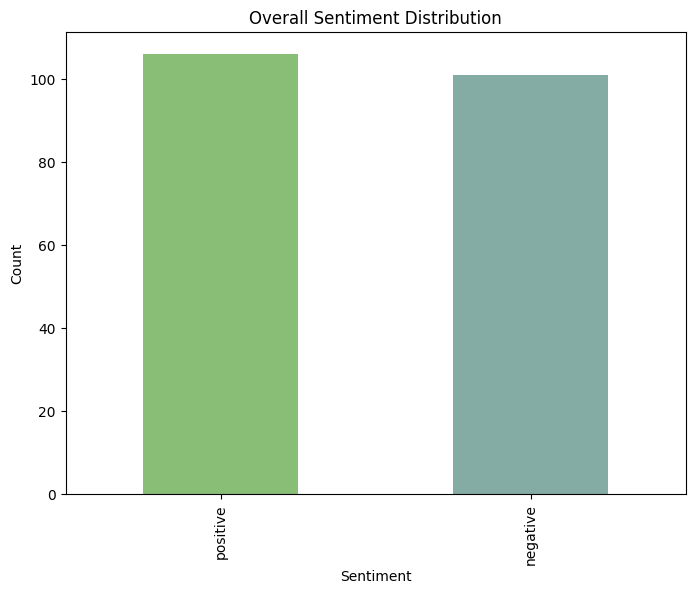

In [21]:
sentiment_counts = data['Sentiment'].value_counts()

colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(sentiment_counts))]
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

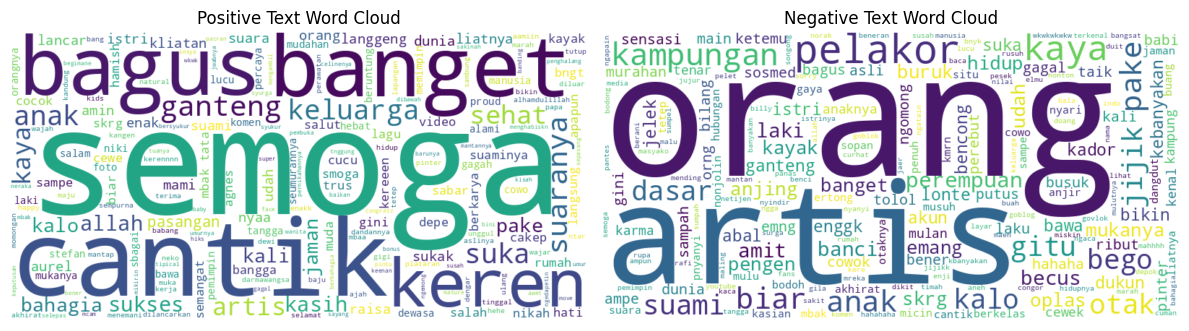

In [20]:
positive_data = data[data['Sentiment'] == 'positive']
negative_data = data[data['Sentiment'] == 'negative']

positive_text = clean_join(positive_data['Text'])
negative_text = clean_join(negative_data['Text'])

positive_text = preprocess_text(positive_text)
negative_text = preprocess_text(negative_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n = 10

top_positive_words, top_positive_words_percent = get_top_words(positive_text, n=n)
top_negative_words, top_negative_words_percent = get_top_words(negative_text, n=n)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
words, counts = zip(*top_positive_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
words, counts = zip(*top_negative_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
words, counts = zip(*top_positive_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment Percentage')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
words, counts = zip(*top_negative_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment Percentage')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# News Data

In [ ]:
data = pd.read_excel('news.xlsx', dtype=str)
df = pd.DataFrame(data, columns=['Category', 'Text', 'Sentiment'])

sentiment_counts = data['Sentiment'].value_counts()

colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(sentiment_counts))]
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()

In [ ]:
grouped_data = data.groupby(['Category', 'Sentiment']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Category by Sentiment')

plt.legend(title='Sentiment')
plt.show()

In [ ]:
positive_data = data[data['Sentiment'] == 'positive']
negative_data = data[data['Sentiment'] == 'negative']
neutral_data = data[data['Sentiment'] == 'neutral']

positive_text = clean_join(positive_data['Text'])
negative_text = clean_join(negative_data['Text'])
neutral_text = clean_join(neutral_data['Text'])

positive_text = preprocess_text(positive_text)
negative_text = preprocess_text(negative_text)
neutral_text = preprocess_text(neutral_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Text Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n = 5

top_positive_words, top_positive_words_percent = get_top_words(positive_text, n=n)
top_negative_words, top_negative_words_percent = get_top_words(negative_text, n=n)
top_neutral_words, top_neutral_words_percent = get_top_words(neutral_text, n=n)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
words, counts = zip(*top_positive_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
words, counts = zip(*top_negative_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
words, counts = zip(*top_neutral_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
words, counts = zip(*top_positive_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 3, 2)
words, counts = zip(*top_negative_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 3, 3)
words, counts = zip(*top_neutral_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Neutral Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# Medicine Startup Review Data

In [ ]:
data = pd.read_csv('twitter.csv', dtype=str)
df = pd.DataFrame(data, columns=['Category', 'Text', 'Sentiment'])

sentiment_counts = data['Sentiment'].value_counts()

colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(sentiment_counts))]
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()

In [ ]:
grouped_data = data.groupby(['Category', 'Sentiment']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Category by Sentiment')

plt.legend(title='Sentiment')
plt.show()

In [ ]:
positive_data = data[data['Sentiment'] == 'Positive']
negative_data = data[data['Sentiment'] == 'Negative']
neutral_data = data[data['Sentiment'] == 'Neutral']

positive_text = clean_join(positive_data['Text'])
negative_text = clean_join(negative_data['Text'])
neutral_text = clean_join(neutral_data['Text'])

positive_text = preprocess_text(positive_text)
negative_text = preprocess_text(negative_text)
neutral_text = preprocess_text(neutral_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Text Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n = 5

top_positive_words, top_positive_words_percent = get_top_words(positive_text, n=n)
top_negative_words, top_negative_words_percent = get_top_words(negative_text, n=n)
top_neutral_words, top_neutral_words_percent = get_top_words(neutral_text, n=n)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
words, counts = zip(*top_positive_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
words, counts = zip(*top_negative_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
words, counts = zip(*top_neutral_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
words, counts = zip(*top_positive_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 3, 2)
words, counts = zip(*top_negative_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 3, 3)
words, counts = zip(*top_neutral_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Neutral Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# Internet Provider Tweet Data

In [ ]:
data = pd.read_csv('tweet.csv', dtype=str)
df = pd.DataFrame(data, columns=['Category', 'Text', 'Sentiment'])

sentiment_counts = data['Sentiment'].value_counts()

colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(sentiment_counts))]
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()

In [ ]:
grouped_data = data.groupby(['Category', 'Sentiment']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Category by Sentiment')

plt.legend(title='Sentiment')
plt.show()

In [ ]:
positive_data = data[data['Sentiment'] == 'Positive']
negative_data = data[data['Sentiment'] == 'Negative']
neutral_data = data[data['Sentiment'] == 'Neutral']

positive_text = clean_join(positive_data['Text'])
negative_text = clean_join(negative_data['Text'])
neutral_text = clean_join(neutral_data['Text'])

positive_text = preprocess_text(positive_text)
negative_text = preprocess_text(negative_text)
neutral_text = preprocess_text(neutral_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Text Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n = 5

top_positive_words, top_positive_words_percent = get_top_words(positive_text, n=n)
top_negative_words, top_negative_words_percent = get_top_words(negative_text, n=n)
top_neutral_words, top_neutral_words_percent = get_top_words(neutral_text, n=n)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
words, counts = zip(*top_positive_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
words, counts = zip(*top_negative_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
words, counts = zip(*top_neutral_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
words, counts = zip(*top_positive_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 3, 2)
words, counts = zip(*top_negative_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 3, 3)
words, counts = zip(*top_neutral_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Neutral Sentiment Percent')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# Hotel Review Data

In [ ]:
data = pd.read_csv('hotel.csv', dtype=str)
df = pd.DataFrame(data, columns=['Category', 'Text', 'Sentiment'])

sentiment_counts = data['Sentiment'].value_counts()

colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(sentiment_counts))]
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()

In [ ]:
grouped_data = data.groupby(['Category', 'Sentiment']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Category by Sentiment')

plt.legend(title='Sentiment')
plt.show()

In [ ]:
positive_data = data[data['Sentiment'] == 'pos']
negative_data = data[data['Sentiment'] == 'neg']

positive_text = clean_join(positive_data['Text'])
negative_text = clean_join(negative_data['Text'])

positive_text = preprocess_text(positive_text)
negative_text = preprocess_text(negative_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n = 10

top_positive_words, top_positive_words_percent = get_top_words(positive_text, n=n)
top_negative_words, top_negative_words_percent = get_top_words(negative_text, n=n)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
words, counts = zip(*top_positive_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
words, counts = zip(*top_negative_words)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
words, counts = zip(*top_positive_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Positive Sentiment Percentage')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
words, counts = zip(*top_negative_words_percent)
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(words))]
plt.bar(words, counts, color=colors)
plt.title('Top ' + str(n) + ' Words - Negative Sentiment Percentage')
plt.xlabel('Words')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()